# 数据处理教程

## 1、缺失值处理

数据缺失主要包括记录缺失和字段信息缺失等情况，其对数据分析会有较大影响，导致结果不确定性更加显著


缺失值的处理：删除记录 / 数据插补 / 不处理

In [2]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats

%matplotlib inline 

In [3]:
# 判断是否有缺失值数据 - isnull，notnull
# isnull：缺失值为True，非缺失值为False
# notnull：缺失值为False，非缺失值为True


s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

s

0    12.0
1    33.0
2    45.0
3    23.0
4     NaN
5     NaN
6    66.0
7    54.0
8     NaN
9    99.0
dtype: float64

In [4]:
df

,value1,value2
0,12.0,a
1,33.0,b
2,45.0,c
3,23.0,d
4,NaN,e
5,NaN,NaN
6,66.0,NaN
7,54.0,f
8,NaN,g
9,99.0,NaN


In [8]:
s.isnull()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [9]:
df.notnull()

,value1,value2
0,True,True
1,True,True
2,True,True
3,True,True
4,False,True
5,False,False
6,True,False
7,True,True
8,False,True
9,True,False


In [10]:
df.value1.notnull()

0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9      True
10     True
Name: value1, dtype: bool

In [13]:
df2 = df[df['value1'].notnull()]

df2

,value1,value2
0,12.0,a
1,33.0,b
2,45.0,c
3,23.0,d
6,66.0,NaN
7,54.0,f
9,99.0,NaN
10,190.0,g


In [12]:
s2 = s[s.isnull() == False]
s2

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64

In [14]:
# 删除缺失值 - dropna

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

s

0    12.0
1    33.0
2    45.0
3    23.0
4     NaN
5     NaN
6    66.0
7    54.0
8     NaN
9    99.0
dtype: float64

In [15]:
df

,value1,value2
0,12.0,a
1,33.0,b
2,45.0,c
3,23.0,d
4,NaN,e
5,NaN,NaN
6,66.0,NaN
7,54.0,f
8,NaN,g
9,99.0,NaN


In [16]:
s.dropna(inplace=True)
s

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64

In [17]:
df2= df['value1'].dropna()

df2

0      12.0
1      33.0
2      45.0
3      23.0
6      66.0
7      54.0
9      99.0
10    190.0
Name: value1, dtype: float64

 填充/替换缺失数据 - fillna、replace

In [18]:
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

df

,value1,value2
0,12.0,a
1,33.0,b
2,45.0,c
3,23.0,d
4,NaN,e
5,NaN,NaN
6,66.0,NaN
7,54.0,f
8,NaN,g
9,99.0,NaN


In [19]:
s

0    12.0
1    33.0
2    45.0
3    23.0
4     NaN
5     NaN
6    66.0
7    54.0
8     NaN
9    99.0
dtype: float64

In [22]:
s.fillna(0, inplace=True)
s

0    12.0
1    33.0
2    45.0
3    23.0
4     0.0
5     0.0
6    66.0
7    54.0
8     0.0
9    99.0
dtype: float64

## 补充

DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)



In [23]:
df = pd.DataFrame([[np.nan,2,np.nan,0],
                   [3,4,np.nan,1],
                   [np.nan,np.nan,np.nan,5],
                   [np.nan,3,np.nan,4]],
                   columns=list('ABCD'))

df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [24]:
df.fillna(0)


,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [26]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [27]:
df.fillna(method='ffill')  # 按照列 往下传播

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [29]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [30]:
values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


In [31]:
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

df

,value1,value2
0,12.0,a
1,33.0,b
2,45.0,c
3,23.0,d
4,NaN,e
5,NaN,NaN
6,66.0,NaN
7,54.0,f
8,NaN,g
9,99.0,NaN


In [33]:
df['value1'].fillna(method = 'pad',inplace = True)
df

,value1,value2
0,12.0,a
1,33.0,b
2,45.0,c
3,23.0,d
4,23.0,e
5,23.0,NaN
6,66.0,NaN
7,54.0,f
8,54.0,g
9,99.0,NaN


In [34]:
s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan,'缺失数据',inplace = True)

s

0        1
1        1
2        1
3        1
4        2
5        2
6        2
7        3
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object

In [35]:
s.replace([1,2,3],np.nan,inplace = True)
print(s)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object


# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （1）均值/中位数/众数插补

In [36]:
s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])

s

0      1.0
1      2.0
2      3.0
3      NaN
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     NaN
11     NaN
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     NaN
18     3.0
19     4.0
dtype: float64

In [37]:
u = s.mean()     # 均值
me = s.median()  # 中位数
mod = s.mode()   # 众数

In [38]:
u

4.5625

In [39]:
me

4.5

In [40]:
mod

0    5.0
dtype: float64

In [42]:

s.fillna(u,inplace = True)
s

0      1.0000
1      2.0000
2      3.0000
3      4.5625
4      3.0000
5      4.0000
6      5.0000
7      5.0000
8      5.0000
9      5.0000
10     4.5625
11     4.5625
12     6.0000
13     6.0000
14     7.0000
15    12.0000
16     2.0000
17     4.5625
18     3.0000
19     4.0000
dtype: float64

In [43]:
s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])

s

0      1.0
1      2.0
2      3.0
3      NaN
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     NaN
11     NaN
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     NaN
18     3.0
19     4.0
dtype: float64

In [44]:
s.fillna(method = 'ffill',inplace = True)
s

0      1.0
1      2.0
2      3.0
3      3.0
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     5.0
11     5.0
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     2.0
18     3.0
19     4.0
dtype: float64

# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法

In [47]:
from scipy.interpolate import lagrange
x = [3, 6, 9]
y = [10, 8, 4]

lagrange(x,y)

# 的输出值为的是多项式的n个系数
# 这里输出3个值，分别为a0,a1,a2
# # y = a0 * x**2 + a1 * x + a2 → y = -0.11111111 * x**2 + 0.33333333 * x + 10

poly1d([-0.11111111,  0.33333333, 10.        ])

# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法，实际运用

In [48]:
data = pd.Series(np.random.rand(100)*100)

data

0     97.575968
1      7.974926
2     32.153235
3     30.353918
4     98.464361
        ...    
95    49.726745
96    67.384743
97     2.798904
98    74.609244
99    78.226822
Length: 100, dtype: float64

In [49]:
data[3,6,33,56,45,66,67,80,90] = np.nan

data

0     97.575968
1      7.974926
2     32.153235
3           NaN
4     98.464361
        ...    
95    49.726745
96    67.384743
97     2.798904
98    74.609244
99    78.226822
Length: 100, dtype: float64

In [50]:
data_na = data[data.isnull()]

data_na

3    NaN
6    NaN
33   NaN
45   NaN
56   NaN
66   NaN
67   NaN
80   NaN
90   NaN
dtype: float64

In [52]:
data_c = data.fillna(data.median())  #  中位数填充缺失值

data_c

0     97.575968
1      7.974926
2     32.153235
3     46.740547
4     98.464361
        ...    
95    49.726745
96    67.384743
97     2.798904
98    74.609244
99    78.226822
Length: 100, dtype: float64

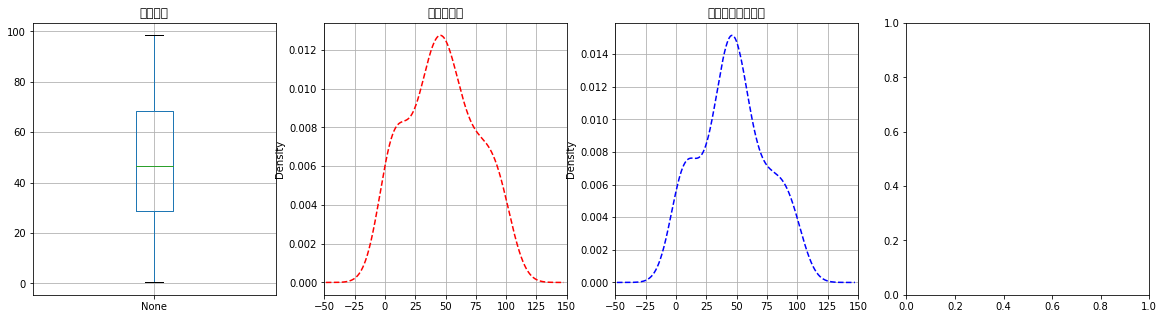

In [53]:
fig,axes = plt.subplots(1,4,figsize = (20,5))
data.plot.box(ax = axes[0],grid = True,title = '数据分布')
data.plot(kind = 'kde',style = '--r',ax = axes[1],grid = True,title = '删除缺失值',xlim = [-50,150])
data_c.plot(kind = 'kde',style = '--b',ax = axes[2],grid = True,title = '缺失值填充中位数',xlim = [-50,150])
# 密度图查看缺失值情况

# 异常值处理

异常值是指样本中的个别值，其数值明显偏离其余的观测值。

异常值也称离群点，异常值的分析也称为离群点的分析

异常值分析 → 3σ原则 / 箱型图分析

异常值处理方法 → 删除 / 修正填补

In [55]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

data = pd.Series(np.random.randn(10000)*100)

data

0        95.138313
1        67.166285
2       -72.006460
3      -127.601859
4       230.950831
           ...    
9995   -205.273574
9996     93.280084
9997    187.499049
9998     85.144670
9999    119.224462
Length: 10000, dtype: float64

In [56]:
u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
stats.kstest(data, 'norm', (u, std))

KstestResult(statistic=0.007337207167521065, pvalue=0.6546110623454445)

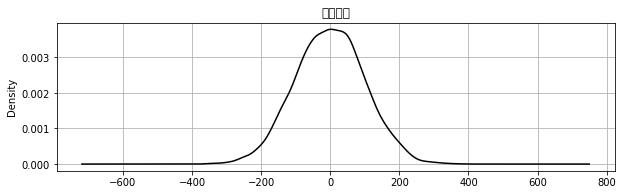

In [57]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')

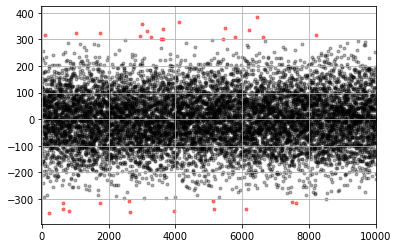

In [58]:
ax2 = fig.add_subplot(2,1,2)
error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]

# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
# 图表表达


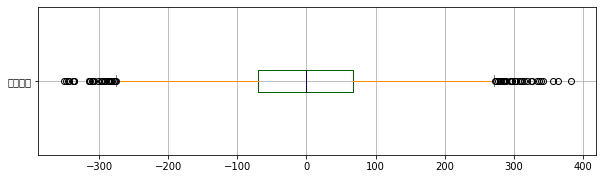

In [59]:
# 异常值分析
# （2）箱型图分析

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')

In [60]:
s = data.describe()
s

count    10000.000000
mean        -0.769587
std        100.345300
min       -351.387016
25%        -69.954221
50%         -0.598949
75%         66.799079
max        382.390562
dtype: float64

In [62]:
q1 = s['25%']
q3 = s['75%']
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr

print('分位差为：%.3f，下限为：%.3f，上限为：%.3f' % (iqr,mi,ma))

分位差为：136.753，下限为：-275.084，上限为：271.929


In [63]:
ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
print('异常值共%i条' % len(error))

异常值共64条


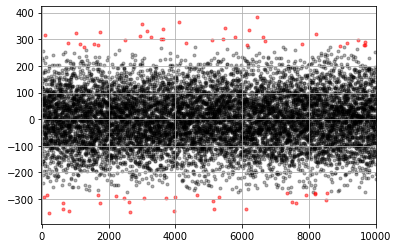

In [64]:
plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()

# 数据归一化/标准化

数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权.
最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上

## 0-1标准化 / Z-score标准化

In [ ]:
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)



In [66]:
df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
df

,value1,value2
0,19.069130,29.323333
1,7.220936,58.733843
2,8.173261,92.056665
3,11.131330,90.137125
4,18.676192,94.235805
5,17.926304,75.147994
6,17.822157,97.315478
7,10.976683,50.034924
8,12.764417,86.557637
9,1.412831,30.313198


In [67]:
def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)
# 创建函数，标准化数据

df_n = data_norm(df,'value1','value2')

df_n

,value1,value2,value1_n,value2_n
0,19.069130,29.323333,1.000000,0.000000
1,7.220936,58.733843,0.328954,0.432557
2,8.173261,92.056665,0.382891,0.922656
3,11.131330,90.137125,0.550427,0.894424
4,18.676192,94.235805,0.977745,0.954705
5,17.926304,75.147994,0.935274,0.673970
6,17.822157,97.315478,0.929375,1.000000
7,10.976683,50.034924,0.541668,0.304617
8,12.764417,86.557637,0.642920,0.841778
9,1.412831,30.313198,0.000000,0.014559


In [ ]:
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

In [68]:
df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})

df

,value1,value2
0,73.733859,15.479836
1,32.224913,86.676234
2,83.446114,34.460583
3,8.183506,32.678145
4,90.853665,59.452420
5,57.950621,73.927030
6,34.822112,65.998948
7,53.786554,4.077941
8,33.286484,61.571742
9,61.083773,76.673532


In [69]:
def data_Znorm(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col + '_Zn'] = (df_n[col] - u) / std
    return(df_n)
# 创建函数，标准化数据

df_z = data_Znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)
print('标准化后value1的均值为:%.2f, 标准差为：%.2f' % (u_z, std_z))


      value1     value2  value1_Zn  value2_Zn
0  73.733859  15.479836   0.802823  -1.282885
1  32.224913  86.676234  -0.799563   1.281329
2  83.446114  34.460583   1.177749  -0.599273
3   8.183506  32.678145  -1.727642  -0.663470
4  90.853665  59.452420   1.463705   0.300834
5  57.950621  73.927030   0.193537   0.822153
6  34.822112  65.998948  -0.699302   0.536614
7  53.786554   4.077941   0.032789  -1.693537
8  33.286484  61.571742  -0.758582   0.377164
9  61.083773  76.673532   0.314487   0.921071
标准化后value1的均值为:0.00, 标准差为：1.00


In [71]:
# 案例应用
# 八类产品的两个指标value1，value2，其中value1权重为0.6，value2权重为0.4
# 通过0-1标准化，判断哪个产品综合指标状况最好

df = pd.DataFrame({"value1":np.random.rand(10) * 30,
                  'value2':np.random.rand(10) * 100},
                 index = list('ABCDEFGHIJ'))
#print(df.head())
#print('------')
# 创建数据"

df

,value1,value2
A,7.607643,52.933343
B,14.885495,76.084559
C,22.980232,66.445874
D,2.131108,91.136789
E,18.754973,3.302478
F,21.248003,20.508986
G,23.116860,20.192673
H,2.450997,10.179083
I,26.480455,87.558344
J,26.423947,89.656149


,value1,value2,value1_n,value2_n,f
J,26.423947,89.656149,0.997679,0.983143,0.991865
I,26.480455,87.558344,1.000000,0.959259,0.983704
C,22.980232,66.445874,0.856250,0.718892,0.801307
B,14.885495,76.084559,0.523808,0.828629,0.645737
G,23.116860,20.192673,0.861861,0.192296,0.594035
F,21.248003,20.508986,0.785109,0.195897,0.549424
E,18.754973,3.302478,0.682723,0.000000,0.409634
D,2.131108,91.136789,0.000000,1.000000,0.400000
A,7.607643,52.933343,0.224915,0.565051,0.360969
H,2.450997,10.179083,0.013137,0.078291,0.039199


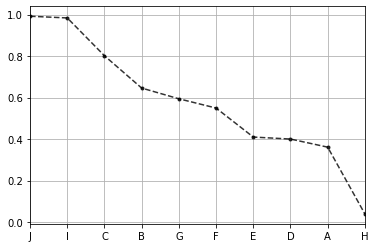

In [72]:
df_n1 = data_norm(df,'value1','value2')
# 进行标准化处理

df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1
# 查看综合指标状况

# 数据连续属性离散化

连续属性变换成分类属性，即连续属性离散化 在数值的取值范围内设定若干个离散划分点，将取值范围划分为一些离散化的区间，最后用不同的符号或整数值代表每个子区间中的数据值

## 等宽法 / 等频法

In [74]:
# cut方法

ages=[20,22,25,27,21,23,37,31,61,45,41,32]
# 有一组人员年龄数据，希望将这些数据划分为“18到25”,“26到35”,“36到60”,“60以上”几个面元

bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats)
print(type(cats))

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
<class 'pandas.core.arrays.categorical.Categorical'>


In [75]:

print(cats.codes, type(cats.codes))  # 0-3对应分组后的四个区间，用代号来注释数据对应区间，结果为ndarray
print(cats.categories, type(cats.categories))  # 四个区间，结果为index
print(pd.value_counts(cats))  # 按照区间计数

[0 0 0 1 0 0 2 1 3 2 2 1] <class 'numpy.ndarray'>
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]') <class 'pandas.core.indexes.interval.IntervalIndex'>
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [76]:
group_names=['Youth','YoungAdult','MiddleAged','Senior']
print(pd.cut(ages,bins,labels=group_names))

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]


In [77]:
# 等频法 → 以相同数量的记录放进每个区间
# qcut方法

In [79]:
data = np.random.randn(1000)
s = pd.Series(data)

s

0     -0.763019
1     -0.226518
2      0.319567
3      1.104754
4     -0.953381
         ...   
995   -1.945068
996    0.681008
997   -0.476189
998    0.389195
999   -1.311361
Length: 1000, dtype: float64

In [81]:
cats = pd.qcut(s,4)  # 按四分位数进行切割，可以试试 pd.qcut(data,10)
print(cats.head())

0    (-3.213, -0.669]
1     (-0.669, 0.017]
2      (0.017, 0.695]
3      (0.695, 2.946]
4    (-3.213, -0.669]
dtype: category
Categories (4, interval[float64]): [(-3.213, -0.669] < (-0.669, 0.017] < (0.017, 0.695] < (0.695, 2.946]]


In [82]:
print(pd.value_counts(cats))

(0.695, 2.946]      250
(0.017, 0.695]      250
(-0.669, 0.017]     250
(-3.213, -0.669]    250
dtype: int64


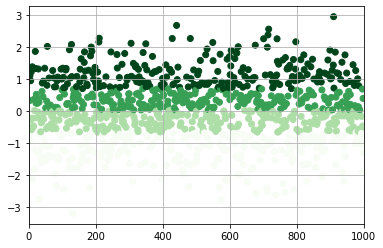

In [83]:
plt.scatter(s.index,s,cmap = 'Greens',c = pd.qcut(data,4).codes)
plt.xlim([0,1000])
plt.grid()

In [85]:
c = pd.qcut(data,4).codes
c

array([0, 1, 2, 3, 0, 3, 1, 3, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 0, 3, 3, 2,
       2, 2, 1, 2, 0, 1, 3, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 3, 0, 2, 3,
       1, 1, 0, 3, 0, 0, 2, 0, 1, 2, 3, 3, 0, 1, 2, 1, 3, 2, 0, 2, 2, 0,
       0, 1, 1, 1, 1, 3, 1, 1, 3, 0, 3, 1, 0, 2, 3, 1, 1, 0, 3, 2, 3, 0,
       0, 1, 1, 1, 2, 0, 1, 1, 3, 0, 3, 2, 0, 3, 0, 3, 3, 0, 2, 3, 0, 1,
       3, 3, 1, 2, 2, 3, 1, 2, 1, 0, 0, 3, 1, 1, 3, 1, 0, 3, 3, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 3, 3, 1, 0, 0, 2, 2, 1, 1, 1, 3, 3,
       0, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 3, 3, 1, 3, 1, 0, 1, 0, 3, 3, 2,
       0, 0, 3, 1, 0, 0, 2, 1, 3, 1, 3, 0, 3, 2, 0, 3, 2, 3, 2, 1, 0, 3,
       1, 3, 1, 3, 1, 1, 2, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 0, 2, 2, 0, 2,
       1, 0, 2, 3, 0, 1, 0, 0, 1, 2, 3, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0,
       3, 2, 2, 3, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1, 3, 0, 1, 2, 3,
       3, 1, 0, 1, 2, 2, 3, 0, 3, 0, 2, 2, 2, 1, 3, 1, 0, 1, 1, 2, 0, 1,
       3, 2, 0, 3, 1, 0, 1, 3, 3, 2, 0, 2, 2, 2, 2,